In [ ]:
import  pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import math

from catboost import CatBoostRegressor, Pool

import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline



c:\Users\akhma\Desktop\Project\.project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read the cleaned DataFrame with selected features saved in data_manipulation module
%store -r df_train
# Read the cleaned DataFrame with selected features saved in data_manipulation module
%store -r df_test

In [4]:
categorical_features = df_train.select_dtypes(include="category").columns.tolist()
print(categorical_features)

['KitchenQual', 'ExterQual', 'LandContour', 'GarageFinish', 'BsmtQual', 'OverallQual', 'MSZoning', 'Neighborhood', 'FireplaceQu']


In [3]:
# Split train data
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(columns=["SalePrice"]), df_train["SalePrice"], test_size=0.33, random_state=42)

In [6]:
print(X_train)

      LotArea  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  GrLivArea  \
615      8800       1963          1963         763          936       1054   
613      8402       2007          2007         206         1120       1120   
1302    10120       1994          1994         740         1165       2526   
486     10289       1965          1965         836         1073       1073   
561     10010       1974          1975        1071         1389       1389   
...       ...        ...           ...         ...          ...        ...   
1095     9317       2006          2006          24         1314       1314   
1130     7804       1928          1950         622         1122       1981   
1294     8172       1955          1990         167          864        864   
860      7642       1918          1998           0          912       1426   
1126     3684       2007          2007           0         1373       1555   

      Fireplaces  GarageCars  TotalFlrSF  TotalFullBath Kitchen

In [ ]:


train_dataset = Pool(X_train, y_train, cat_features = categorical_features) 
test_dataset = Pool(X_test, y_test, cat_features = categorical_features)

# Data to tune the catBoostRegressor model
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

cat_Boost_Regressor = CatBoostRegressor(loss_function='RMSE')

#cat_Boost_Regressor.fit(X_train, y_train, 
#                         cat_features = categorical_features)

cat_Boost_Regressor.grid_search(grid, train_dataset)

0:	learn: 188229.3563412	test: 195618.6657158	best: 195618.6657158 (0)	total: 138ms	remaining: 13.7s
1:	learn: 183162.7519747	test: 190534.9724000	best: 190534.9724000 (1)	total: 148ms	remaining: 7.25s
2:	learn: 178291.1841901	test: 185385.3620292	best: 185385.3620292 (2)	total: 154ms	remaining: 4.96s
3:	learn: 173522.7243755	test: 180460.8378103	best: 180460.8378103 (3)	total: 162ms	remaining: 3.89s
4:	learn: 168983.3664131	test: 175846.8790898	best: 175846.8790898 (4)	total: 169ms	remaining: 3.22s
5:	learn: 164698.4064016	test: 171534.0834923	best: 171534.0834923 (5)	total: 177ms	remaining: 2.77s
6:	learn: 160331.8995970	test: 167163.4667777	best: 167163.4667777 (6)	total: 183ms	remaining: 2.44s
7:	learn: 156110.6254701	test: 162771.2265894	best: 162771.2265894 (7)	total: 192ms	remaining: 2.21s
8:	learn: 152033.3223407	test: 158698.7981309	best: 158698.7981309 (8)	total: 199ms	remaining: 2.01s
9:	learn: 148137.4101537	test: 154677.0645782	best: 154677.0645782 (9)	total: 207ms	remaini

{'params': {'depth': 8,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5,
  'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [ ]:


# Make predictions
y_pred = cat_Boost_Regressor.predict(X_test)

"""
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")"""
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

Mean Squared Error (MSE): 989568034.6663
Root Mean Squared Error (RMSE): 31457.4003
R-squared (R^2): 0.8697


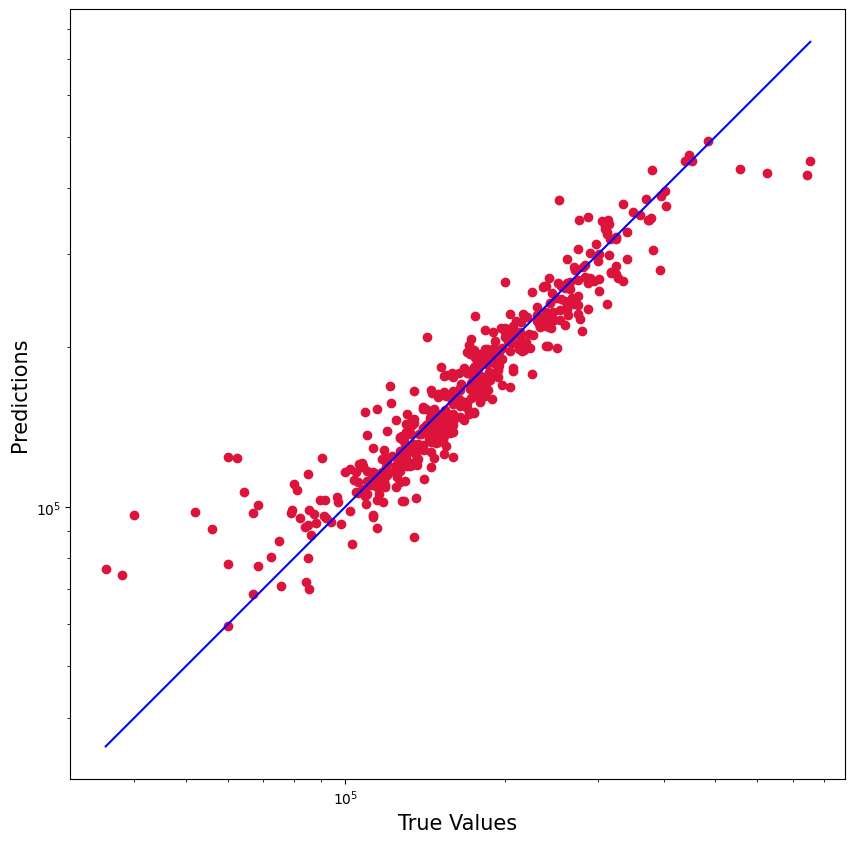

In [9]:
# Plot the difference bewteen the given and the predicted prices
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [10]:
# Predict prices for the test data
y_test_pred = cat_Boost_Regressor.predict(df_test)
print(y_test_pred)

[114278.31042707 157360.94247337 180024.55502128 ...  87747.15966348
 167862.3152746  210926.71875767]
